In [196]:
import pandas as pd

# Load the data
file_path = 'JNJ.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
15678,2024-04-16,145.009995,146.250000,143.389999,144.449997,144.449997,12774900
15679,2024-04-17,145.000000,145.410004,143.539993,144.770004,144.770004,9378100
15680,2024-04-18,144.979996,145.800003,143.130005,145.740005,145.740005,9887700
15681,2024-04-19,146.149994,148.130005,144.539993,147.910004,147.910004,9747700
15682,2024-04-22,148.509995,150.270004,147.300003,149.119995,149.119995,10118700
15683,2024-04-23,149.860001,150.490005,148.199997,149.559998,149.559998,10110400
15684,2024-04-24,148.139999,148.990005,146.860001,148.529999,148.529999,9756300
15685,2024-04-25,149.369995,149.580002,146.330002,146.820007,146.820007,7642700
15686,2024-04-26,146.699997,147.179993,145.949997,146.139999,146.139999,6183000
15687,2024-04-29,146.139999,147.220001,145.990005,146.820007,146.820007,6149600


In [165]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

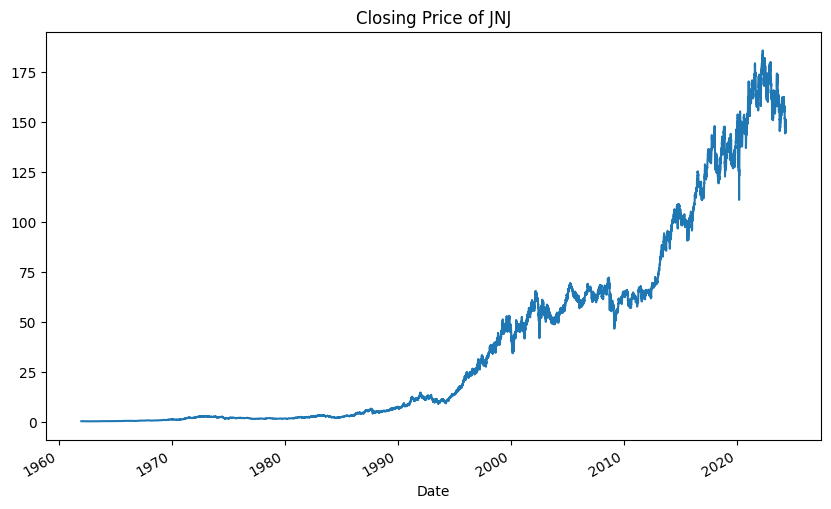

In [166]:
import matplotlib.pyplot as plt

# Plotting the closing price
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Close'].plot(figsize=(10, 6))
plt.title('Closing Price of JNJ')
plt.show()


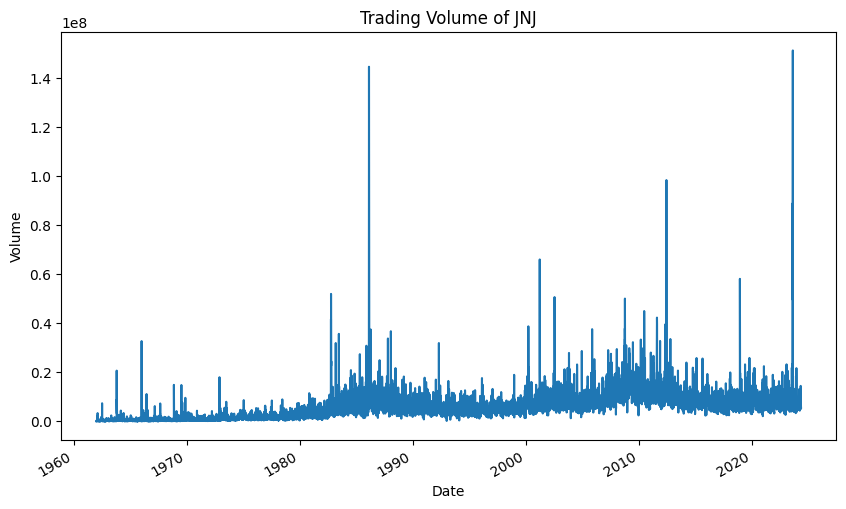

In [167]:
# Plotting the trading volume
data['Volume'].plot(figsize=(10, 6))
plt.title('Trading Volume of JNJ')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


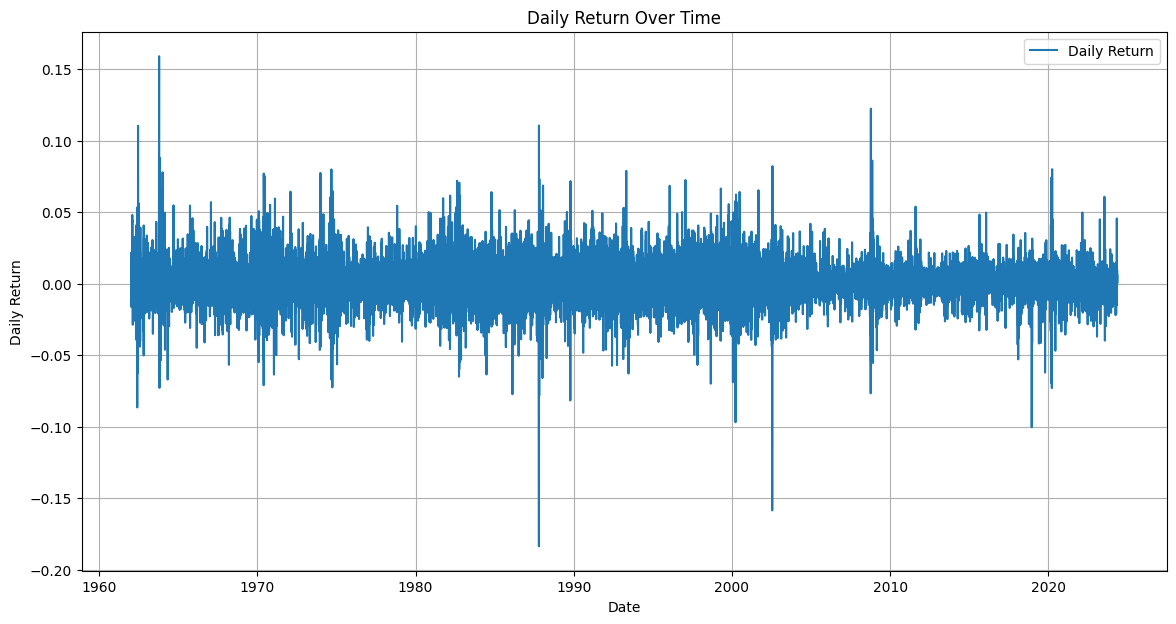

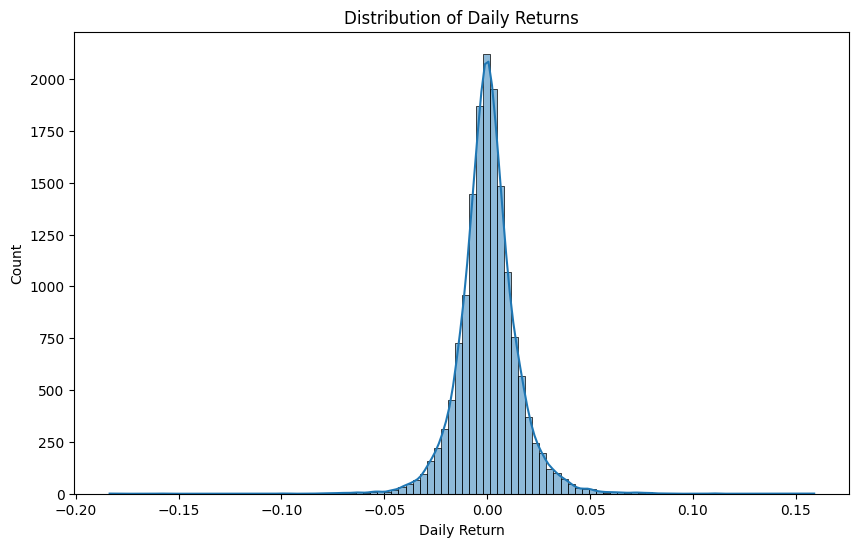

In [168]:
import seaborn as sns

data["Daily Return"] = data["Close"].pct_change()
plt.figure(figsize=(14,7))
plt.plot(data["Daily Return"],label="Daily Return")
plt.title("Daily Return Over Time")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

In [197]:
stock_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set 'Date' as the index
stock_data.set_index('Date', inplace=True)

# Handle missing values
stock_data.fillna(method='ffill', inplace=True)

# Create additional features
stock_data['MA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Return'] = stock_data['Close'].pct_change()

# Drop the first row with NaN values created by pct_change()
stock_data = stock_data.dropna()


In [209]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50', 'Return']
target = 'Close'

X = stock_data[features]
y = stock_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.13589525871885055


In [210]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [211]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the trained model
model = joblib.load('random_forest_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame(data)
    prediction = model.predict(df)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

Mean Absolute Error: 0.06780159475813179


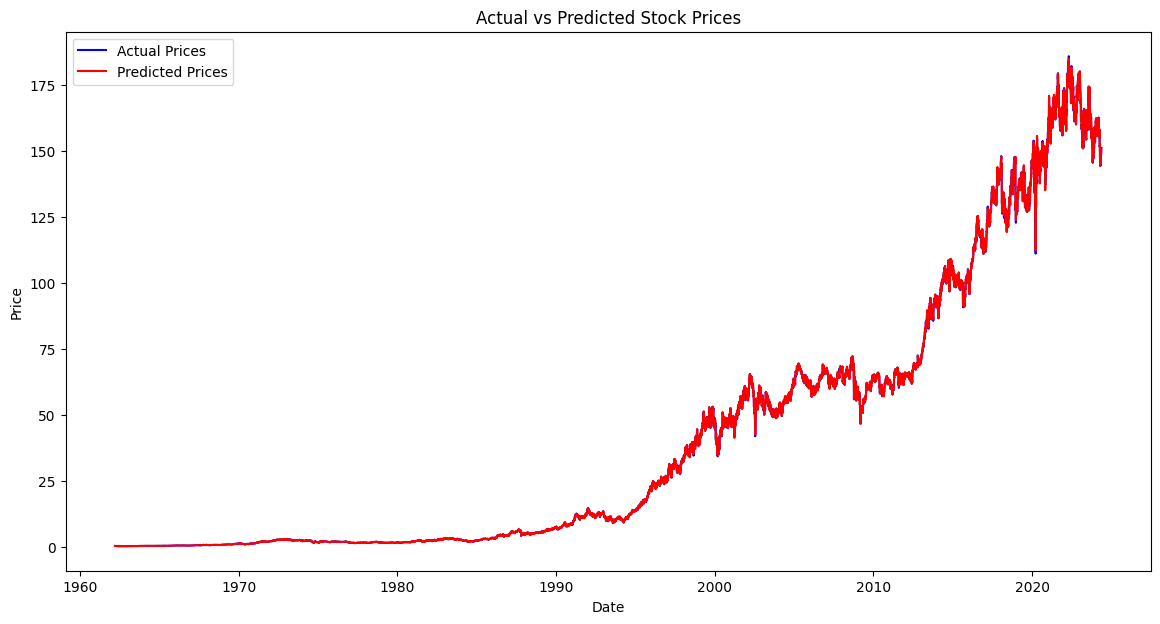

In [212]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'JNJ.csv'  # Update this path accordingly
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Create additional features
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['Return'] = data['Close'].pct_change()

# Drop the first row with NaN values created by pct_change()
data = data.dropna()

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50', 'Return']

X = data[features]

# Load the trained model
model = joblib.load('random_forest_model.pkl')

# Predict the closing prices
predicted_close = model.predict(X)

# Create a DataFrame for comparison
comparison_df = data.copy()
comparison_df['Predicted_Close'] = predicted_close

# Calculate MAE
mae = mean_absolute_error(data['Close'], predicted_close)
print(f"Mean Absolute Error: {mae}")

# Plot the actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(comparison_df.index, comparison_df['Close'], label='Actual Prices', color='blue')
plt.plot(comparison_df.index, comparison_df['Predicted_Close'], label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()
